## Gradinet Decent - Code.

Consider we are working to height to weight dataset, and we are working with linear model.

### Model [ Y = aX+b ]

X is the independent variable, Y is the dependent variable.

We are using MSE as the loss function, we can use any other loss function as we like.But all the loss functions to be defferentiable.
- Differentiable
    - Mean Squared Error (MSE)
    - Mean Absolute Error (MAE)
    - Cross-Entropy
    - Huber loss
- Non Differentiable
    - 0-1 Loss (Error Rate)
    - ROC AUC Loss
    - Hinge Loss
    - Dice Loss

### Loss Funcion [ Loss = 1/N(mean(sum(y_original - y_predicted)**2))]

since y_predicted = aX+b

Now the loss function is dependent on a,b variables.

lets define loss function

### L(a,b) = 1/N(mean(sum(y - (aX+b))**2))

- here y_original = y
- y_predited = aX+b

 Since MSE is a quadratic function,we can optimize this function to get minimum values for a,b so that the loss is minimum.

Since Loss is dependent on a,b ~ we have to do the partial derivation of the loss function w.r.t a and w.r.t b seperatly, this gives a linear function to tells the rate of growth of a and b independently.

### dL/da = -2/N(x* y_org - ax**2 - bx)

### dL/db = -2/N(y_org - ax-b)

when we run this, we will get the new minimum for a,b . we apply this new a,b with a learning rate to find the lowest mins of the requested data.


### Code

In [1]:
import numpy as np
from scipy import linalg

In [ ]:
def gradient_descent(X,Y,learning_rate=1e-4, max_iter=1000000, tol=1e-6):
    
    r = []
    if(X.ndim != 1 or Y.ndim != 1):
        raise ValueError("Input array must be of shape (n_samples, 2)")
    
    _len_X = len(X)
    _len_Y = len(Y)
    a = np.random.rand()
    b = 130+np.random.rand()
    r.append((a,b))
    # print("Initial a:", a, " Initial b:", b)
    fun_y_predict = lambda x: a*x + b
    fun_loss = lambda y_true, y_pred: np.mean((y_true - y_pred)**2)

    ## Compute the MSE loss
    for i in range(0,max_iter):
        y_pred = []
        for x in X:
            y_pred.append(fun_y_predict(x))
        y_pred = np.array(y_pred)

        loss = fun_loss(Y, y_pred)
        # print('Loss at iteration', i, ':', loss)

        # Compute gradients
        dL_da = (-2/_len_X) * np.sum(X * (Y - y_pred))
        dL_db = (-2/_len_Y) * np.sum(Y - y_pred)

        # Update parameters
        a_new = a - learning_rate * dL_da
        b_new = b - learning_rate * dL_db
        # Check for convergence
        if abs(a_new - a) < tol and abs(b_new - b) < tol:
            break
        a, b = a_new, b_new
        r.append((a,b))
    # print("Final a:", a, " Final b:", b)
    return r

Define the inputs

In [3]:
X = np.array([65, 70, 75, 80, 85, 90, 95, 100],dtype=np.float64)
Y = np.array([150, 160, 170, 180, 190, 200, 210, 220],dtype=np.float64)

In [14]:
model_params = gradient_descent(X, Y)
print("Intial a,b",model_params[1])
print("Final a,b",model_params[0])

Intial a,b (np.float64(0.38844927462408446), np.float64(100.0644477065925))
Final a,b (0.28221025108093245, 100.06321461779915)


Lets Plot the results

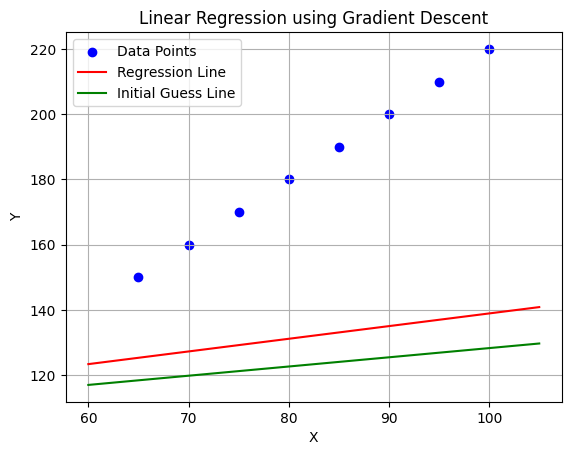

In [18]:
## Plot X and Y along with the regression line
## add the initial guess and final line
import matplotlib.pyplot as plt

# Extract the final parameters
a_final, b_final = model_params[1]
a_initial, b_initial = model_params[0]

# Create a range of x values for plotting the regression line
x_range = np.linspace(60, 105, 100)
y_range = a_final * x_range + b_final

# Plot the original data points
plt.scatter(X, Y, color='blue', label='Data Points')

# Plot the regression line
plt.plot(x_range, y_range, color='red', label='Regression Line')

# Plot the initial guess line
y_initial = a_initial * x_range + b_initial
plt.plot(x_range, y_initial, color='green', label='Initial Guess Line')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression using Gradient Descent')
plt.legend()
plt.grid()
plt.show()